# Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix

### Loading the data 

In [2]:
from sklearn import datasets

In [3]:
boston = datasets.load_boston()

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df["Price"] = boston.target

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### EDA and data pre-processing

In [8]:
pf = ProfileReport(df)

In [9]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
plt.style.use("dark_background")

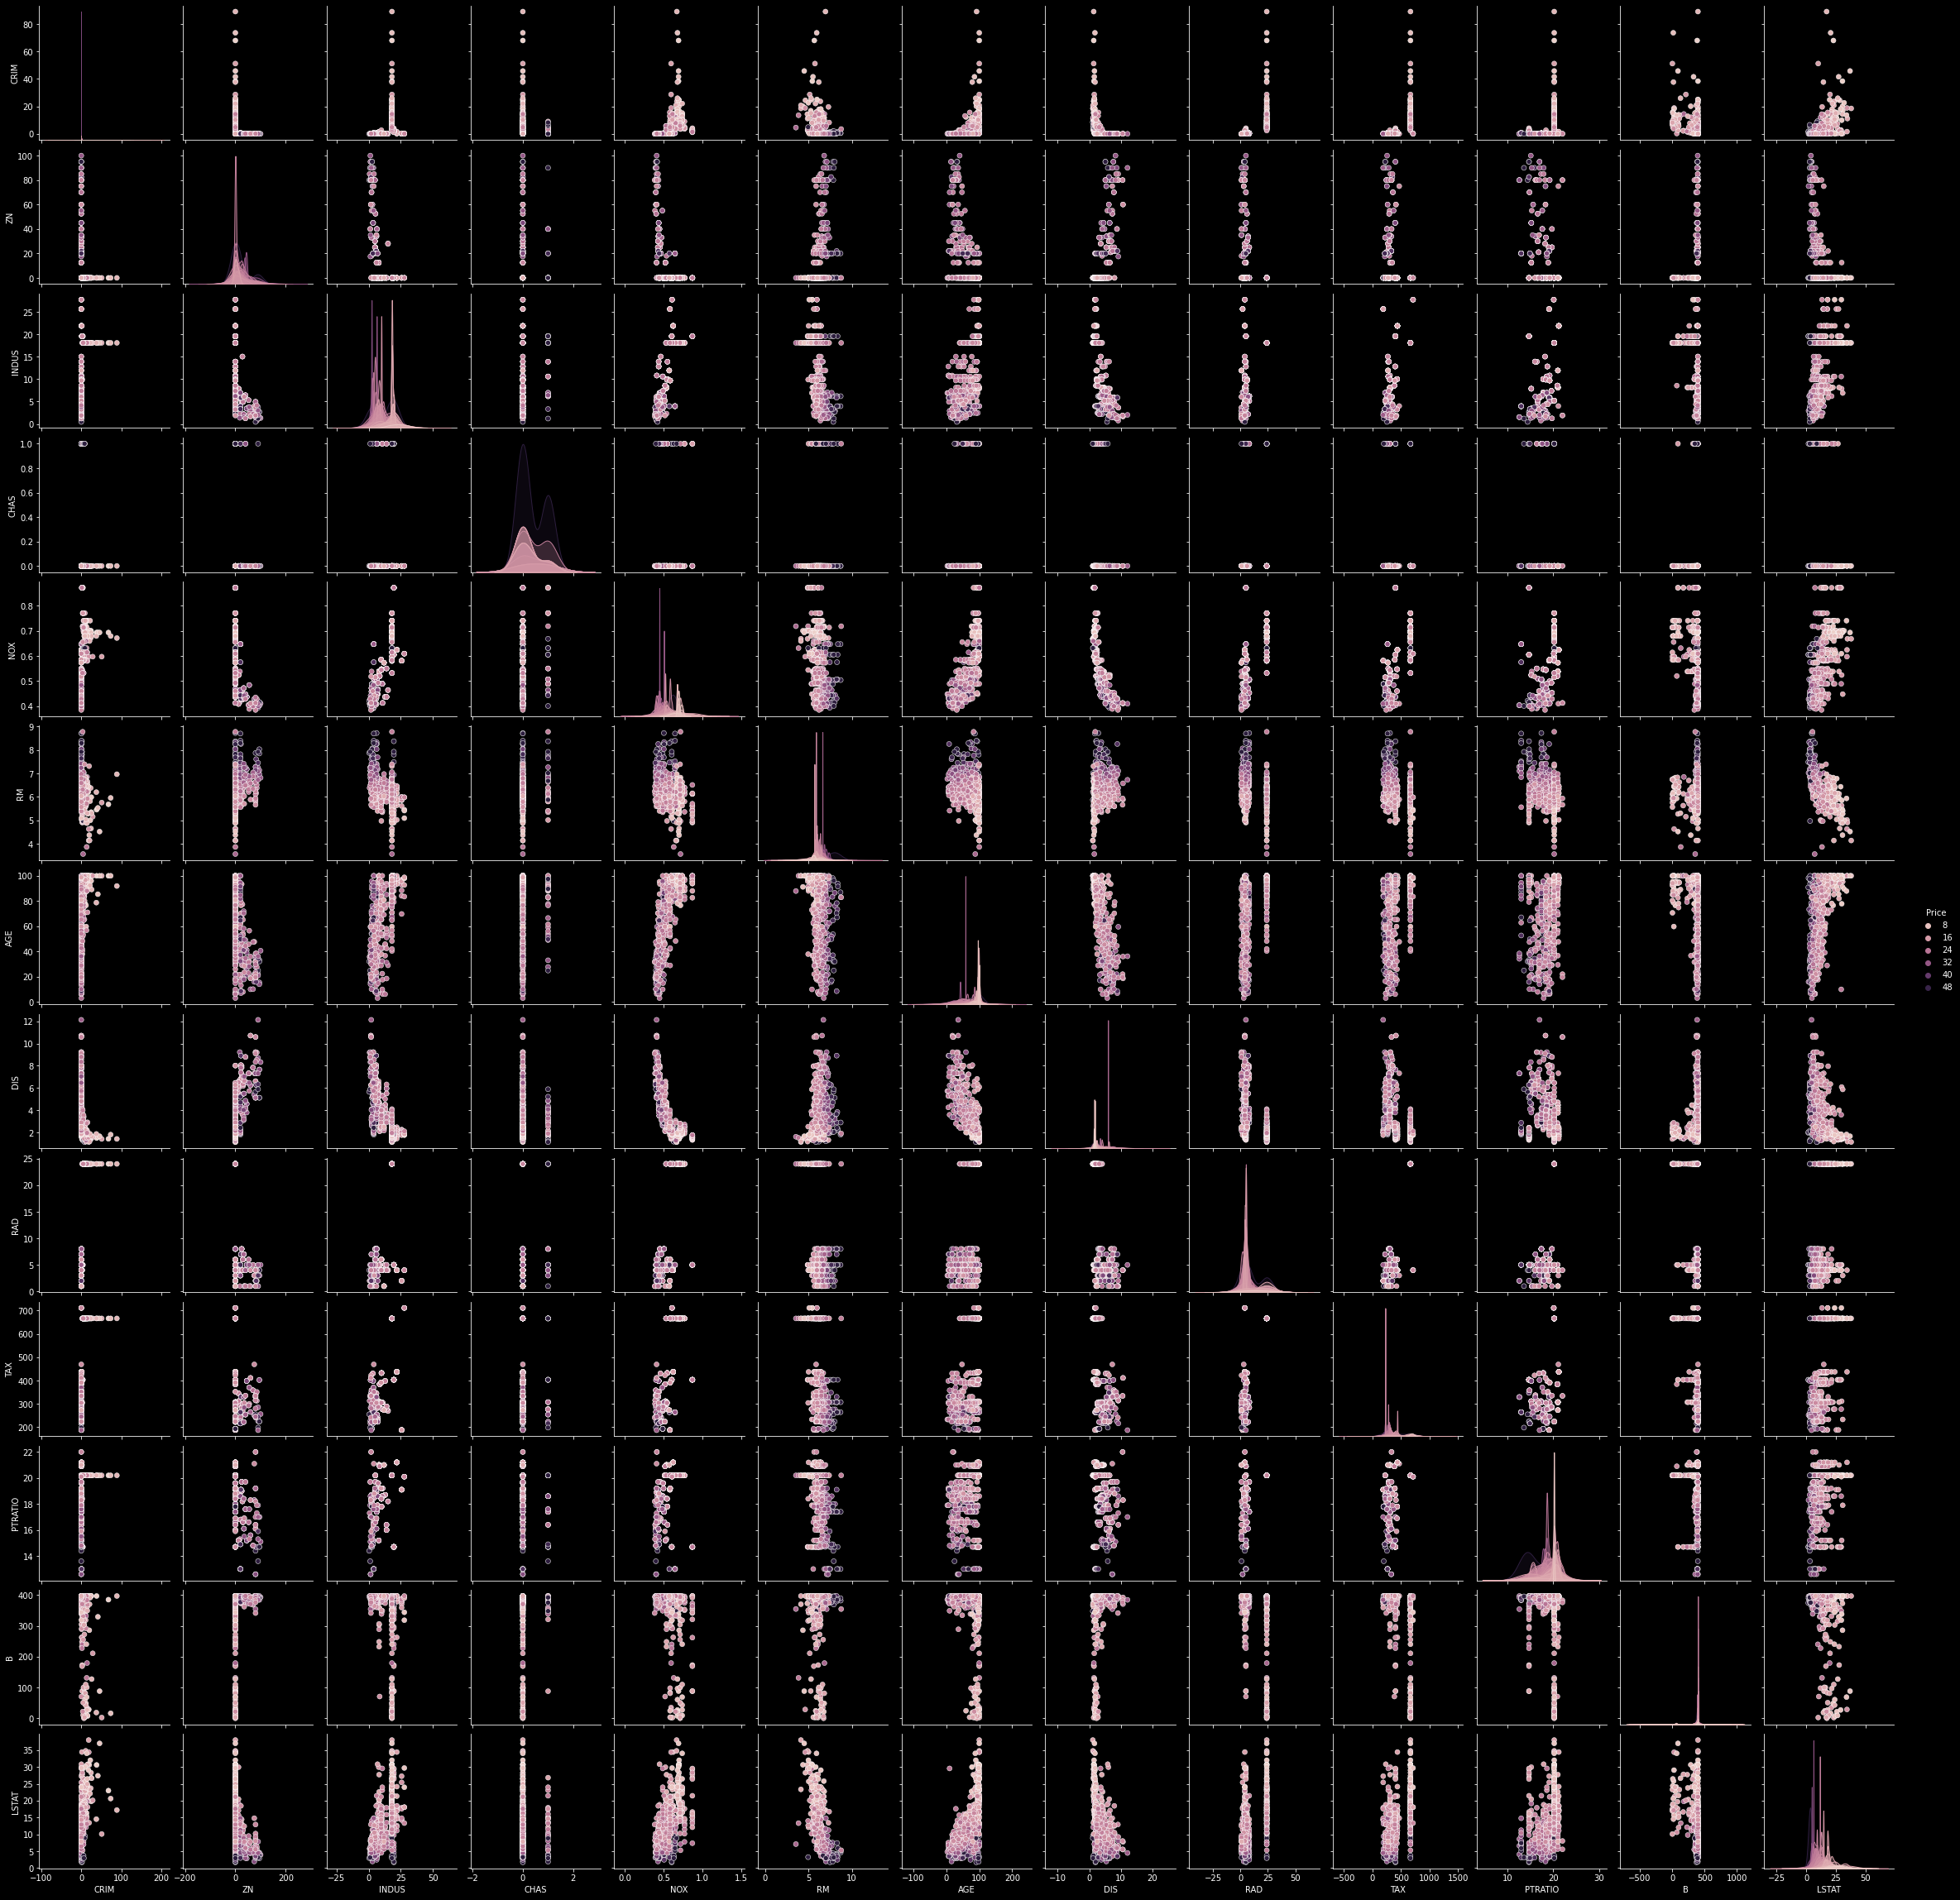

In [11]:
sns.pairplot(data=df,hue='Price')

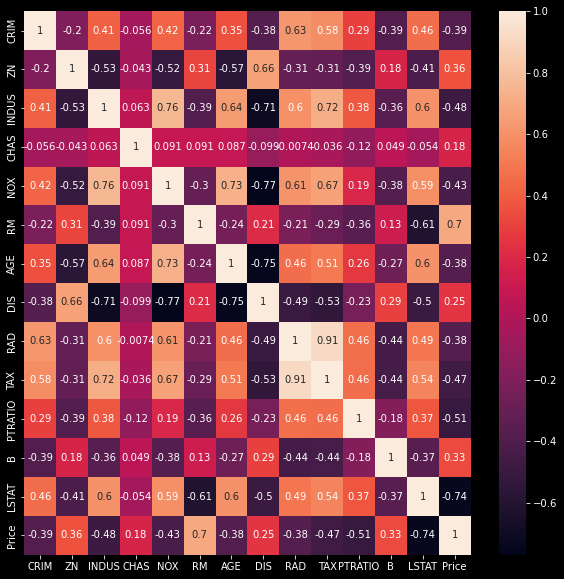

In [12]:
#checking the correlation between the variables
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [14]:
x = df.drop(columns=["Price"]) #Dropping the target variable and considering all the features

In [15]:
y = df["Price"] #considering only target variable

In [16]:
#Standardizating the data
scalar = StandardScaler()

In [17]:
X = scalar.fit_transform(x)

In [18]:
# importing variance_inflation_factor to reduce multicolinerity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
vif = pd.DataFrame() #creating an emoty dataframe

In [20]:
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]

In [21]:
vif["Features"] = x.columns

In [22]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [23]:
#splitting the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
r2_score(y_pred,y_test)

0.865926265073625

In [25]:
rf_model.score(x_train,y_train)

0.9784241553610525

In [26]:
rf_model.score(x_test,y_test)

0.8893035101624889

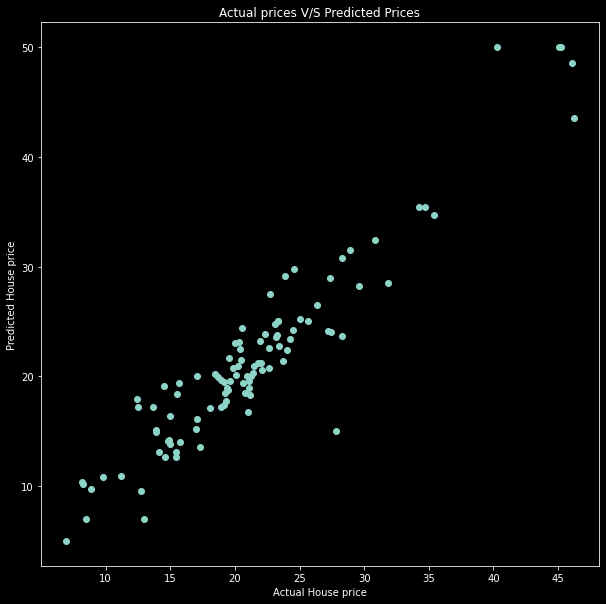

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred,y_test)
plt.xlabel("Actual House price")
plt.ylabel("Predicted House price")
plt.title("Actual prices V/S Predicted Prices")
plt.show()

In [27]:
#Hyper_parameter tuning

In [28]:
parameters = {
    'criterion':['squared_error','absolute_error','poisson'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['sqrt','log2',None]
}

In [29]:
grid = GridSearchCV(rf_model,param_grid=parameters,cv=5,scoring="accuracy")

In [30]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy')

In [31]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 1, 'max_features': 'sqrt'}

In [32]:
model = RandomForestRegressor(criterion='squared_error',
                             max_depth=1,
                             max_features='sqrt',
                             warm_start=True)
model.fit(x_train,y_train)
model_pred = model.predict(x_test)
r2_score(model_pred,y_test)

-2.9369520794460104

In [33]:
model.score(x_train,y_train)

0.5052923668823103

In [34]:
model.score(x_test,y_test)

0.46340953476224067

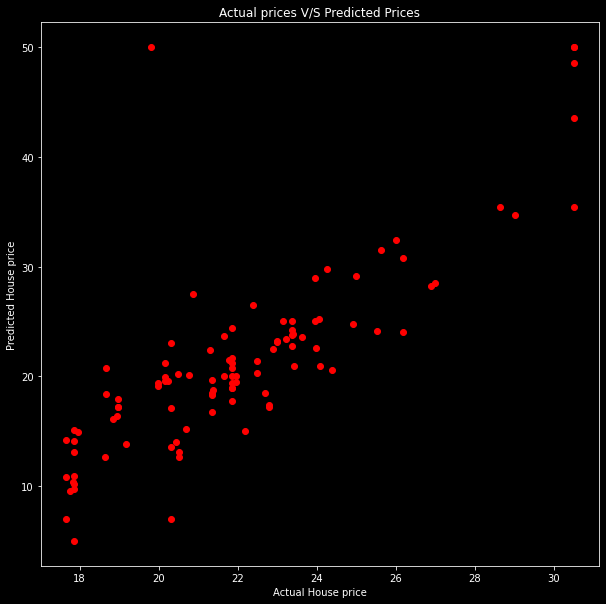

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(model_pred,y_test,color="red")
plt.xlabel("Actual House price")
plt.ylabel("Predicted House price")
plt.title("Actual prices V/S Predicted Prices")
plt.show()